In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 设置中文字体为宋体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置英文字体为新罗马
plt.rcParams['font.serif'] = ['Times New Roman']
# 字体大小
plt.rcParams['font.size'] = 12  
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False 

In [4]:
def data_prepare(file):
    df = pd.read_csv(file, encoding='gbk')
    df['销售日期'] = pd.to_datetime(df['销售日期'])
    df = df.resample('M', on='销售日期').agg({'销量(千克)': 'sum', '销售单价(元/千克)': 'mean'})
    df['日期'] = df.index
    return df

In [5]:
df1 = data_prepare("data_1\\按类别划分附件2\\花菜类.csv")
df2 = data_prepare("data_1\\按类别划分附件2\\花叶类.csv")
df3 = data_prepare("data_1\\按类别划分附件2\\茄类.csv")
df4 = data_prepare("data_1\\按类别划分附件2\\辣椒类.csv")
df5 = data_prepare("data_1\\按类别划分附件2\\食用菌.csv")
df6 = data_prepare("data_1\\按类别划分附件2\\水生根茎类.csv")

In [6]:
df1.head()

,销量(千克),销售单价(元/千克),日期
销售日期,,,
2020-07-31,1522.555,11.079994,2020-07-31
2020-08-31,1748.658,10.579009,2020-08-31
2020-09-30,1336.066,10.936853,2020-09-30
2020-10-31,1644.963,9.739125,2020-10-31
2020-11-30,1943.391,5.578660,2020-11-30


# 第二套数据，这是用来做直方图、箱线图、小提琴的

In [7]:
df = pd.concat([df1['销量(千克)'], df2['销量(千克)'], df3['销量(千克)'], df4['销量(千克)'], df5['销量(千克)'], df6['销量(千克)']], axis=1)
df.columns = ["花菜类", "花叶类", "茄类", "辣椒类", "食用菌", "水生根茎类"]
df.head()

,花菜类,花叶类,茄类,辣椒类,食用菌,水生根茎类
销售日期,,,,,,
2020-07-31,1522.555,6577.078,1365.551,2198.049,1617.836,332.056
2020-08-31,1748.658,7261.517,1139.393,2822.344,1636.524,867.180
2020-09-30,1336.066,5668.902,671.692,1992.413,1642.881,798.931
2020-10-31,1644.963,6395.312,771.967,1908.944,3000.532,1344.118
2020-11-30,1943.391,6518.569,432.389,1837.705,3281.028,960.695


In [8]:
df_clean = df

In [9]:
# df_clean = df.dropna()
# df_clean = pd.DataFrame(np.array(df_clean))
# df_clean.columns = ["花菜类", "花叶类", "茄类", "辣椒类", "食用菌", "水生根茎类"]
# df_clean.head()

## ***分布规律的统计量定量分析***

In [10]:
def detect(df, name):

    print(f"均值 ({name}): {df[name].mean()}")
    print(f"中位数 ({name}): {df[name].median()}")
    print(f"众数 ({name}): {df[name].mode().values[0]}")  # 众数可能有多个，这里只打印第一个
    print(f"方差 ({name}): {df[name].var()}")
    print(f"偏度 ({name}): {df[name].skew()}")
    print(f"峰度 ({name}): {df[name].kurtosis()}")
    print(f"25th Percentile ({name}): {df[name].quantile([0.25, 0.5, 0.75]).loc[0.25]}")
    print(f"50th Percentile ({name}): {df[name].quantile([0.25, 0.5, 0.75]).loc[0.5]}")
    print(f"75th Percentile ({name}): {df[name].quantile([0.25, 0.5, 0.75]).loc[0.75]}")

In [11]:
detect(df_clean, df_clean.columns[0])

均值 (花菜类): 1160.179194444444
中位数 (花菜类): 1195.417
众数 (花菜类): 436.828
方差 (花菜类): 198339.4556740468
偏度 (花菜类): 0.5524730267349417
峰度 (花菜类): 0.5113887319515724
25th Percentile (花菜类): 768.6352499999999
50th Percentile (花菜类): 1195.417
75th Percentile (花菜类): 1478.27825


In [12]:
detect(df_clean, df_clean.columns[1])

均值 (花叶类): 5514.471611111111
中位数 (花叶类): 5406.396500000001
众数 (花叶类): 1891.076
方差 (花叶类): 2963371.460639616
偏度 (花叶类): 0.38697098116202566
峰度 (花叶类): 0.4638016973505015
25th Percentile (花叶类): 4489.697
50th Percentile (花叶类): 5406.396500000001
75th Percentile (花叶类): 6535.96225


In [13]:
detect(df_clean, df_clean.columns[2])

均值 (茄类): 623.1050555555555
中位数 (茄类): 618.6795
众数 (茄类): 105.318
方差 (茄类): 80789.33167039684
偏度 (茄类): 0.3234492754406635
峰度 (茄类): 0.16406667490347004
25th Percentile (茄类): 438.16775
50th Percentile (茄类): 618.6795
75th Percentile (茄类): 769.978


In [14]:
detect(df_clean, df_clean.columns[3])

均值 (辣椒类): 2544.1285833333336
中位数 (辣椒类): 2272.8625
众数 (辣椒类): 803.319
方差 (辣椒类): 1117095.0360895642
偏度 (辣椒类): 0.8206187890390488
峰度 (辣椒类): 0.25683548994168826
25th Percentile (辣椒类): 1891.13425
50th Percentile (辣椒类): 2272.8625
75th Percentile (辣椒类): 3247.05425


In [15]:
detect(df_clean, df_clean.columns[4])

均值 (食用菌): 2113.5201388888895
中位数 (食用菌): 1916.906
众数 (食用菌): 762.225
方差 (食用菌): 940215.4012639514
偏度 (食用菌): 0.6815606312999869
峰度 (食用菌): -0.2649643185545769
25th Percentile (食用菌): 1378.21725
50th Percentile (食用菌): 1916.906
75th Percentile (食用菌): 2772.46075


In [16]:
detect(df_clean, df_clean.columns[5])

均值 (水生根茎类): 1127.2598055555554
中位数 (水生根茎类): 1038.3020000000001
众数 (水生根茎类): 157.828
方差 (水生根茎类): 416839.29414781823
偏度 (水生根茎类): 0.32929648416060786
峰度 (水生根茎类): -0.9702835462245205
25th Percentile (水生根茎类): 535.80925
50th Percentile (水生根茎类): 1038.3020000000001
75th Percentile (水生根茎类): 1593.7785


## ***分布规律数据可视化***

In [17]:
df_clean.columns

Index(['花菜类', '花叶类', '茄类', '辣椒类', '食用菌', '水生根茎类'], dtype='object')

In [18]:
df_clean.head(10)

,花菜类,花叶类,茄类,辣椒类,食用菌,水生根茎类
销售日期,,,,,,
2020-07-31,1522.555,6577.078,1365.551,2198.049,1617.836,332.056
2020-08-31,1748.658,7261.517,1139.393,2822.344,1636.524,867.180
2020-09-30,1336.066,5668.902,671.692,1992.413,1642.881,798.931
2020-10-31,1644.963,6395.312,771.967,1908.944,3000.532,1344.118
2020-11-30,1943.391,6518.569,432.389,1837.705,3281.028,960.695
2020-12-31,1235.596,6901.030,408.995,1427.439,3475.546,1896.154
2021-01-31,1262.447,6412.193,501.591,1919.110,3043.698,1922.910
2021-02-28,1500.920,5741.090,877.194,3824.593,3691.863,1961.572
2021-03-31,1166.262,5060.645,615.974,2574.561,2246.831,904.500


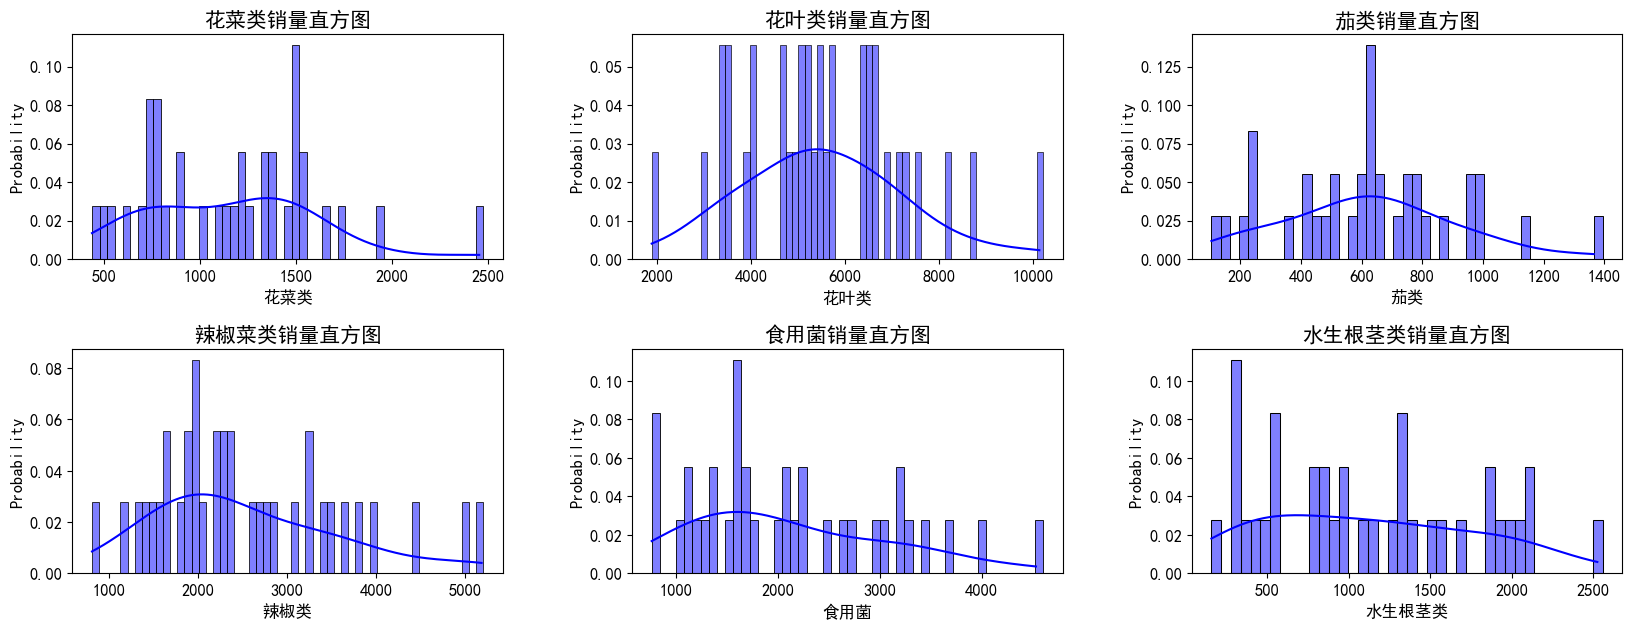

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 7))

# 标准化，使条形高度总和为 1
sns.histplot(data=df_clean, x=df_clean.columns[0], binwidth=40, kde=True, ax=ax[0][0], color='b', stat='probability')
sns.histplot(data=df_clean, x=df_clean.columns[1], binwidth=130, kde=True, ax=ax[0][1], color='b', stat='probability')
sns.histplot(data=df_clean, x=df_clean.columns[2], binwidth=30, kde=True, ax=ax[0][2], color='b', stat='probability')
sns.histplot(data=df_clean, x=df_clean.columns[3], binwidth=80, kde=True, ax=ax[1][0], color='b', stat='probability')
sns.histplot(data=df_clean, x=df_clean.columns[4], binwidth=80, kde=True, ax=ax[1][1], color='b', stat='probability')
sns.histplot(data=df_clean, x=df_clean.columns[5], binwidth=60, kde=True, ax=ax[1][2], color='b', stat='probability')

ax[0][0].set_title("花菜类销量直方图", fontsize=15)
ax[0][1].set_title("花叶类销量直方图", fontsize=15)
ax[0][2].set_title("茄类销量直方图", fontsize=15)
ax[1][0].set_title("辣椒菜类销量直方图", fontsize=15)
ax[1][1].set_title("食用菌销量直方图", fontsize=15)
ax[1][2].set_title("水生根茎类销量直方图", fontsize=15)

fig.subplots_adjust(wspace=0.3, hspace=0.4)

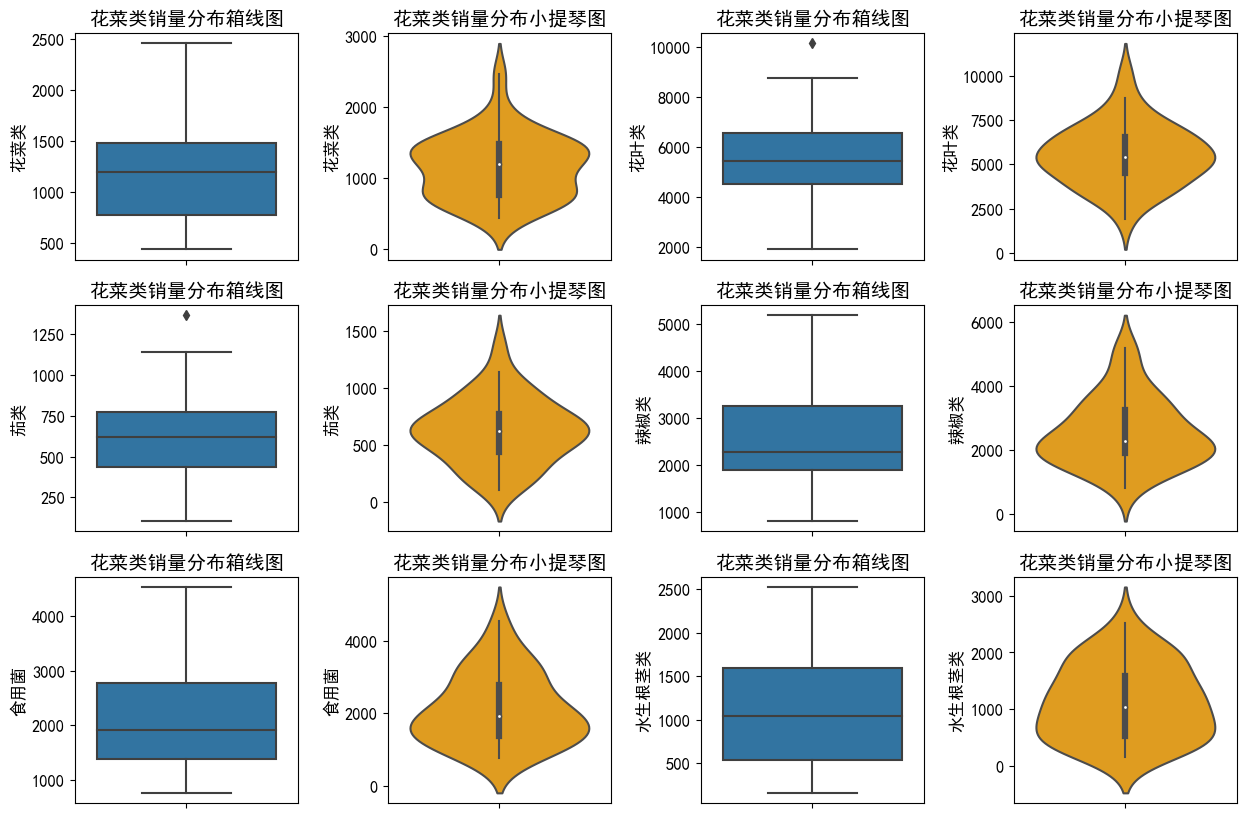

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

sns.boxplot(y=df_clean.columns[0], data=df, ax=ax[0][0])
sns.violinplot(y=df_clean.columns[0], data=df, ax=ax[0][1], color="orange")
sns.boxplot(y=df_clean.columns[1], data=df, ax=ax[0][2])
sns.violinplot(y=df_clean.columns[1], data=df, ax=ax[0][3], color="orange")
sns.boxplot(y=df_clean.columns[2], data=df, ax=ax[1][0])
sns.violinplot(y=df_clean.columns[2], data=df, ax=ax[1][1], color="orange")
sns.boxplot(y=df_clean.columns[3], data=df, ax=ax[1][2])
sns.violinplot(y=df_clean.columns[3], data=df, ax=ax[1][3], color="orange")
sns.boxplot(y=df_clean.columns[4], data=df, ax=ax[2][0])
sns.violinplot(y=df_clean.columns[4], data=df, ax=ax[2][1], color="orange")
sns.boxplot(y=df_clean.columns[5], data=df, ax=ax[2][2])
sns.violinplot(y=df_clean.columns[5], data=df, ax=ax[2][3], color="orange")

ax[0][0].set_title("花菜类销量分布箱线图", fontsize=14)
ax[0][1].set_title("花菜类销量分布小提琴图", fontsize=14)
ax[0][2].set_title("花菜类销量分布箱线图", fontsize=14)
ax[0][3].set_title("花菜类销量分布小提琴图", fontsize=14)
ax[1][0].set_title("花菜类销量分布箱线图", fontsize=14)
ax[1][1].set_title("花菜类销量分布小提琴图", fontsize=14)
ax[1][2].set_title("花菜类销量分布箱线图", fontsize=14)
ax[1][3].set_title("花菜类销量分布小提琴图", fontsize=14)
ax[2][0].set_title("花菜类销量分布箱线图", fontsize=14)
ax[2][1].set_title("花菜类销量分布小提琴图", fontsize=14)
ax[2][2].set_title("花菜类销量分布箱线图", fontsize=14)
ax[2][3].set_title("花菜类销量分布小提琴图", fontsize=14)

fig.subplots_adjust(wspace=0.4, hspace=0.2)
plt.savefig('绘图文件夹\\正文图1.eps')

# 从这里开始是时序图

# 如果正文放不下了，下面这个分图放在附录，那个时序总图一定要有，因为那个直观好比较

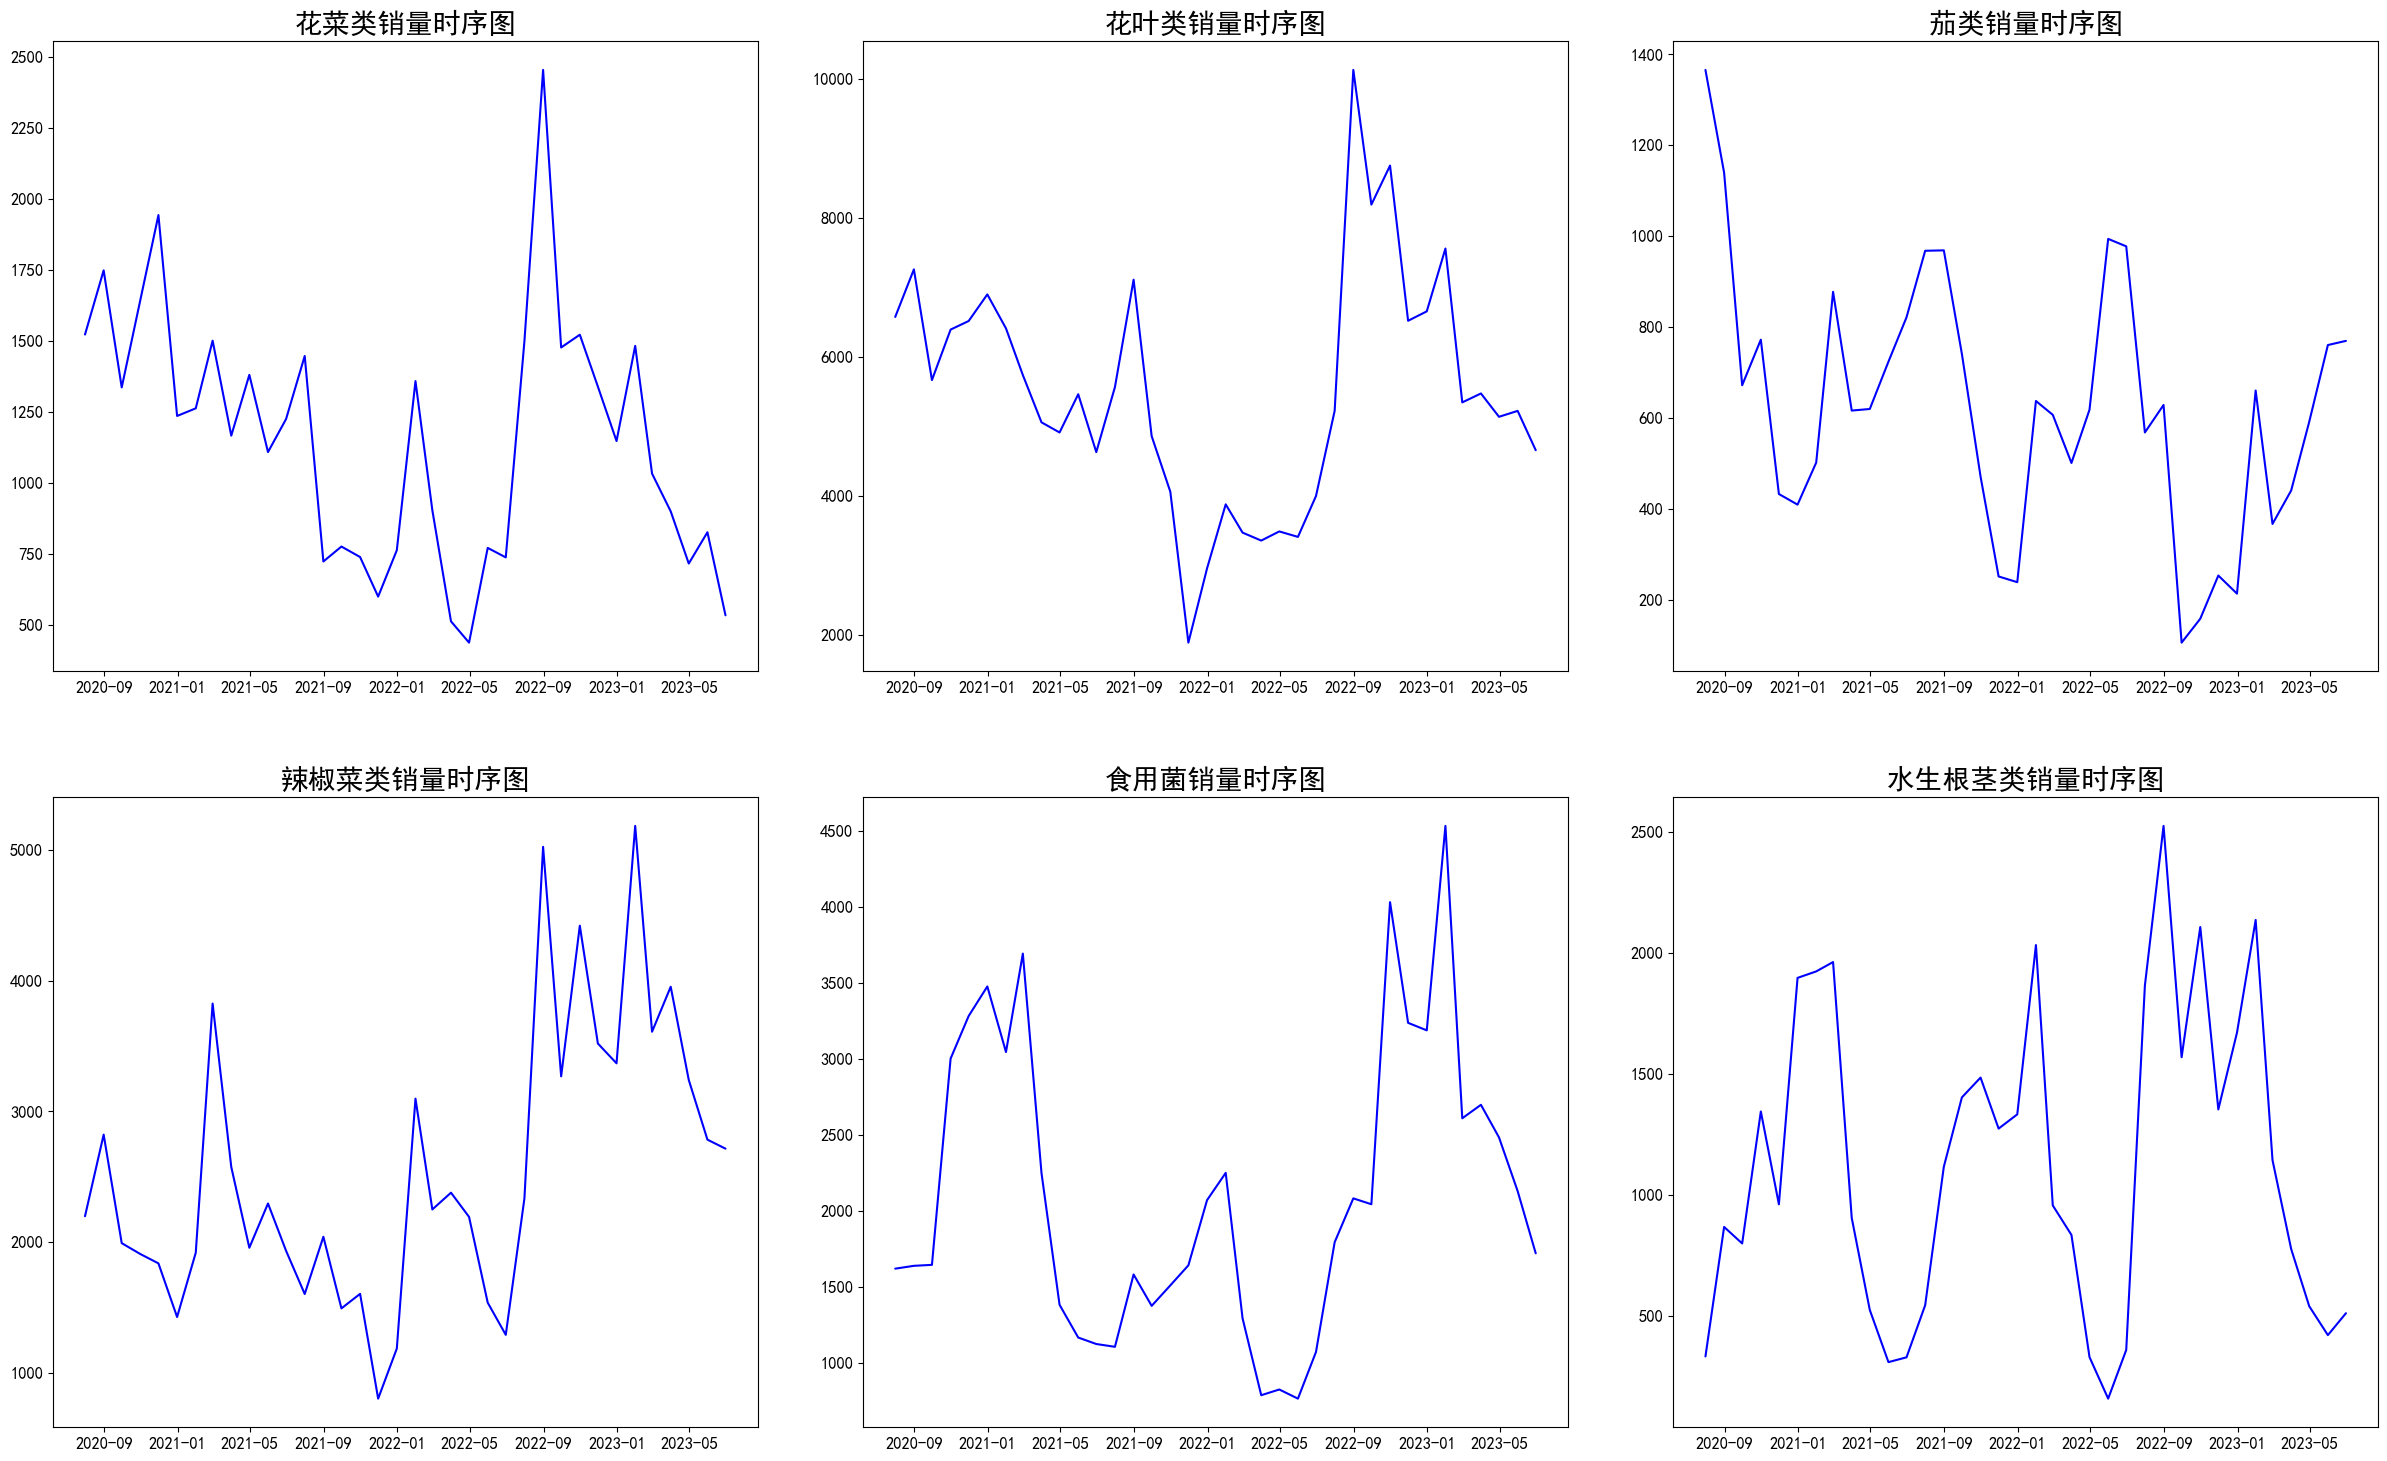

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 18))
sns.set_style("whitegrid", {'font.sans-serif':['simhei', 'Arial']})

ax[0][0].plot(df1['日期'], df1['销量(千克)'], label=df_clean.columns[0], color='b', linestyle='-')
ax[0][1].plot(df2['日期'], df2['销量(千克)'], label=df_clean.columns[1], color='b', linestyle='-')
ax[0][2].plot(df3['日期'], df3['销量(千克)'], label=df_clean.columns[2], color='b', linestyle='-')
ax[1][0].plot(df4['日期'], df4['销量(千克)'], label=df_clean.columns[3], color='b', linestyle='-')
ax[1][1].plot(df5['日期'], df5['销量(千克)'], label=df_clean.columns[4], color='b', linestyle='-')
ax[1][2].plot(df6['日期'], df6['销量(千克)'], label=df_clean.columns[5], color='b', linestyle='-')

ax[0][0].set_title("花菜类销量时序图", fontsize=20)
ax[0][1].set_title("花叶类销量时序图", fontsize=20)
ax[0][2].set_title("茄类销量时序图", fontsize=20)
ax[1][0].set_title("辣椒菜类销量时序图", fontsize=20)
ax[1][1].set_title("食用菌销量时序图", fontsize=20)
ax[1][2].set_title("水生根茎类销量时序图", fontsize=20)

fig.subplots_adjust(wspace=0.15, hspace=0.2)
plt.savefig('绘图文件夹\\附录图1.eps')

C:\Users\jack\AppData\Local\Temp\ipykernel_4220\4272572414.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=45)


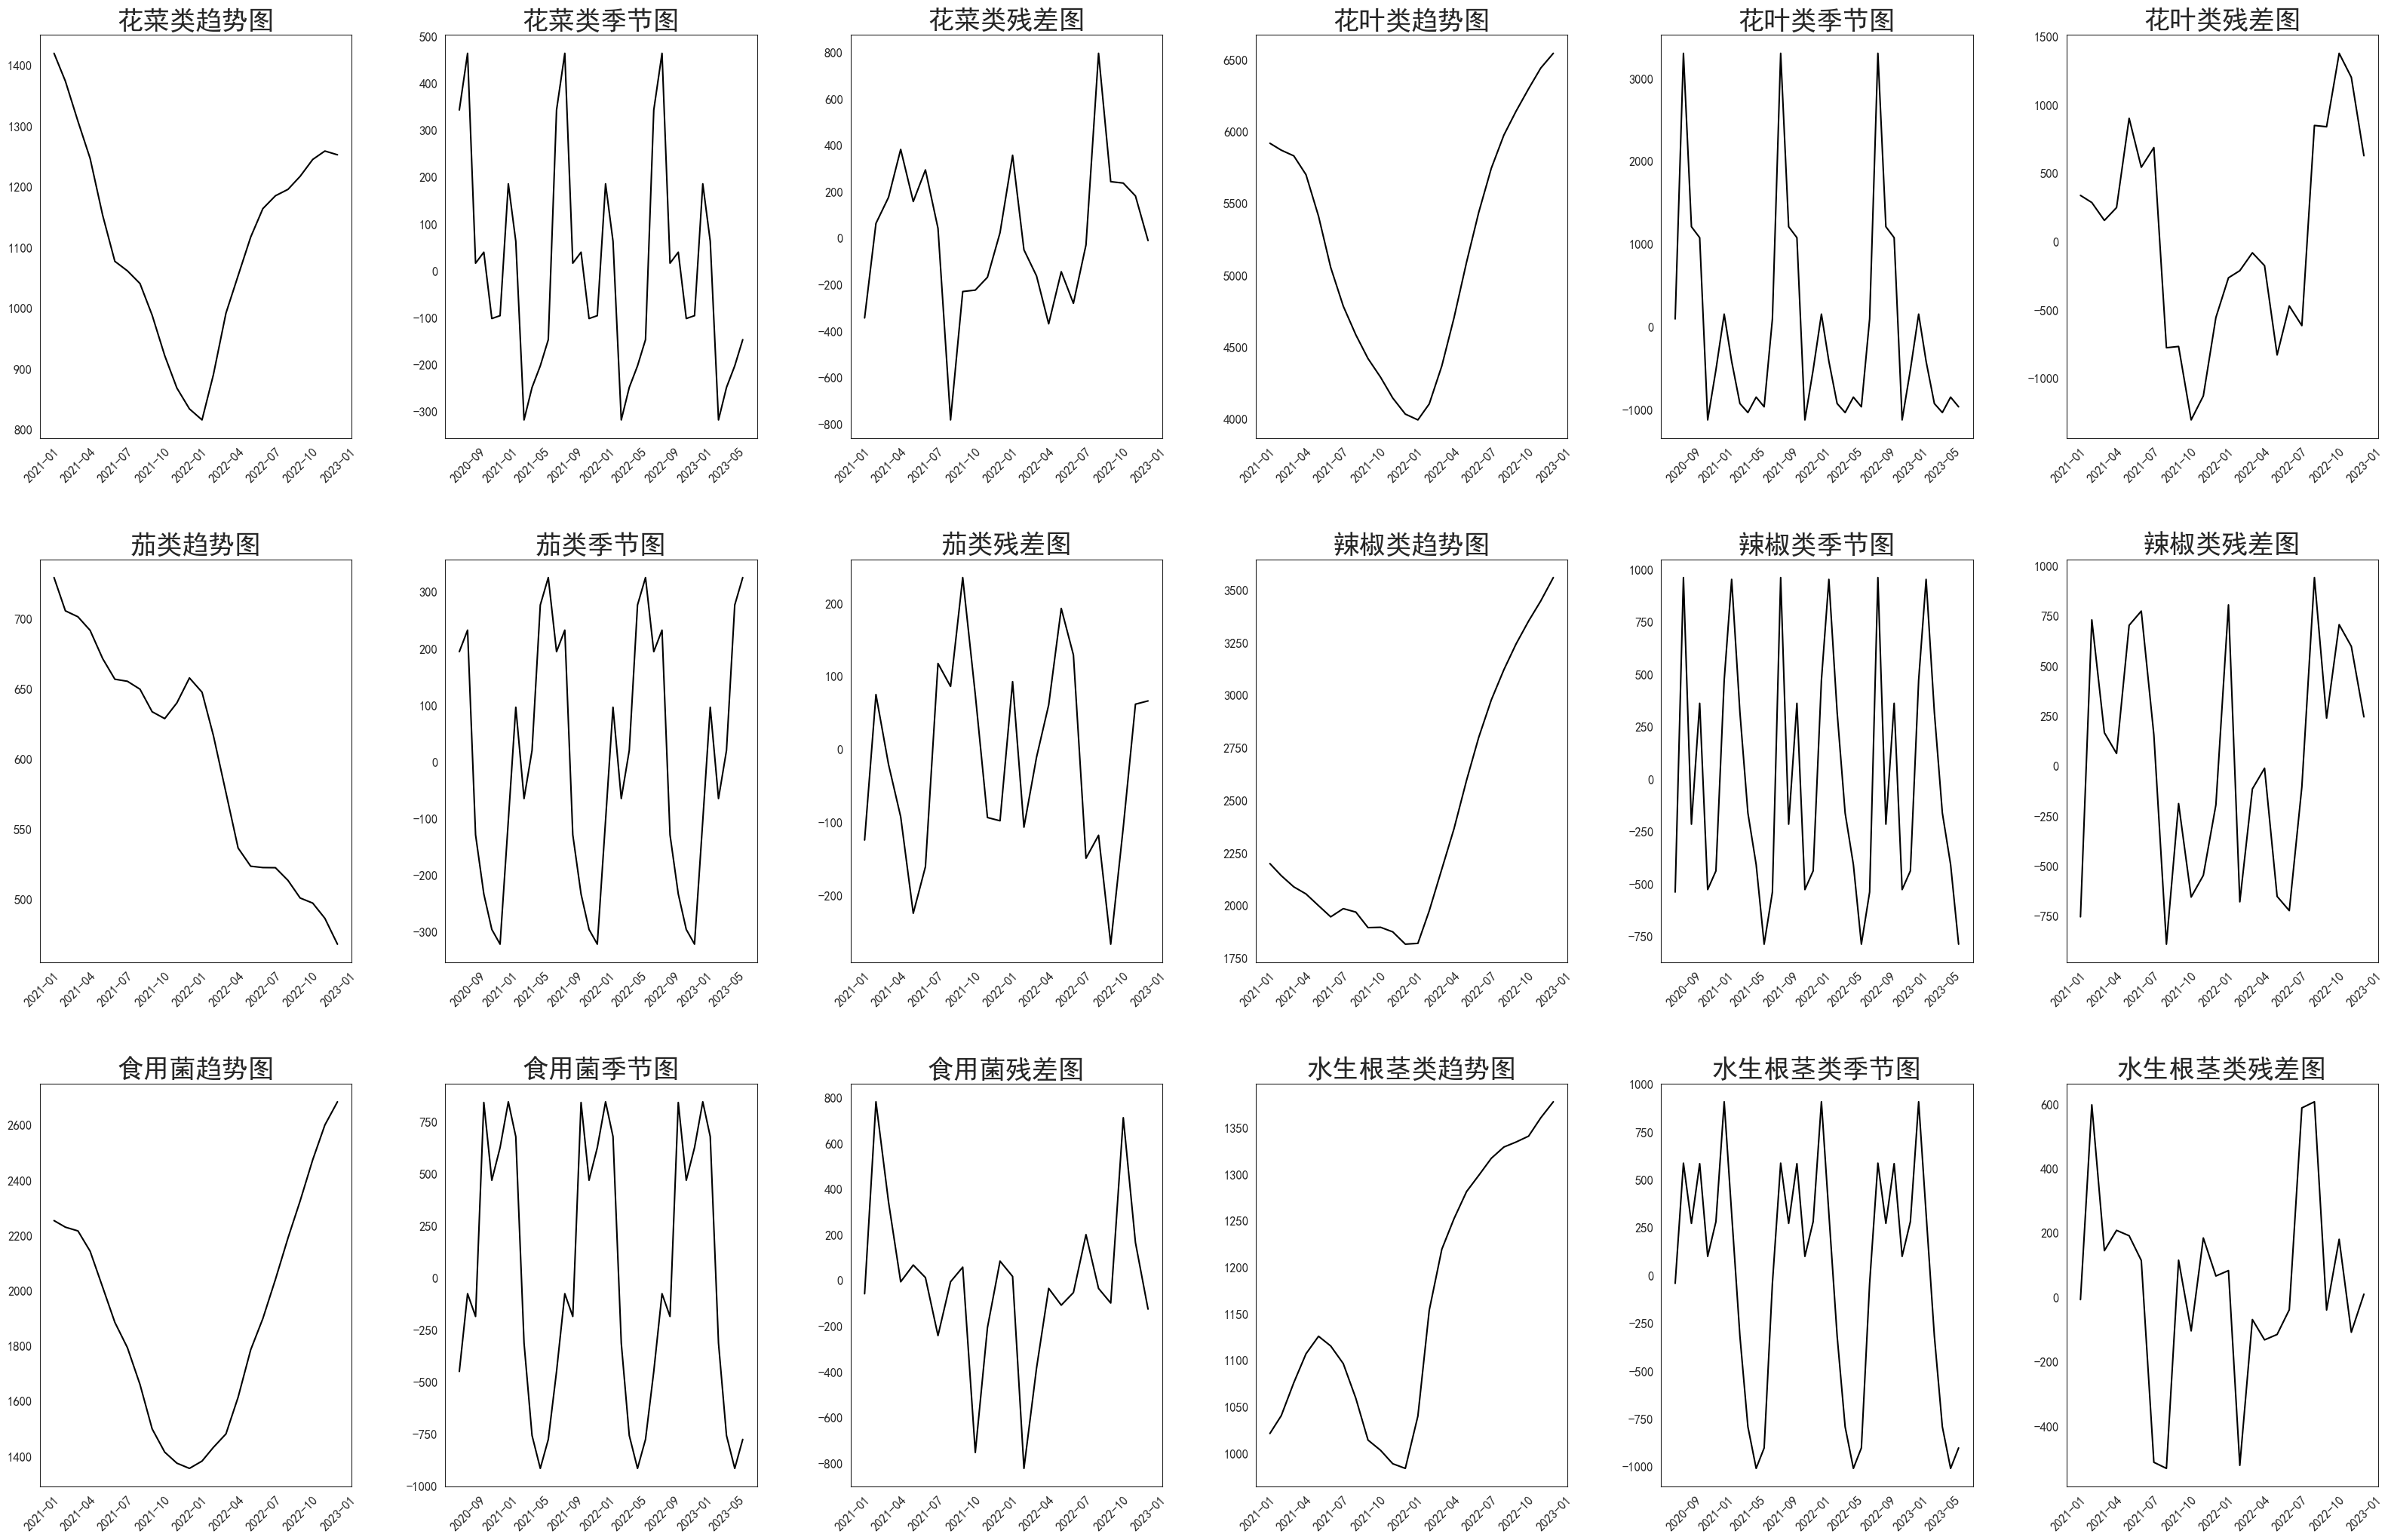

In [22]:
import statsmodels.api as sm
sns.set_style("white", {'font.sans-serif':['simhei', 'Arial']})

# 进行时间序列分解
decomposition1 = sm.tsa.seasonal_decompose(df1["销量(千克)"])
decomposition2 = sm.tsa.seasonal_decompose(df2["销量(千克)"])
decomposition3 = sm.tsa.seasonal_decompose(df3["销量(千克)"])
decomposition4 = sm.tsa.seasonal_decompose(df4["销量(千克)"])
decomposition5 = sm.tsa.seasonal_decompose(df5["销量(千克)"])
decomposition6 = sm.tsa.seasonal_decompose(df6["销量(千克)"])

fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(40, 25))
fig.subplots_adjust(wspace=0.3, hspace=0.3) 

ax[0][0].plot(decomposition1.trend, color='black')
ax[0][0].set_title("花菜类趋势图", fontsize=25)
ax[0][1].plot(decomposition1.seasonal, color='black')
ax[0][1].set_title("花菜类季节图", fontsize=25)
ax[0][2].plot(decomposition1.resid, color='black')
ax[0][2].set_title("花菜类残差图", fontsize=25)

ax[0][3].plot(decomposition2.trend, color='black')
ax[0][3].set_title("花叶类趋势图", fontsize=25)
ax[0][4].plot(decomposition2.seasonal, color='black')
ax[0][4].set_title("花叶类季节图", fontsize=25)
ax[0][5].plot(decomposition2.resid, color='black')
ax[0][5].set_title("花叶类残差图", fontsize=25)

ax[1][0].plot(decomposition3.trend, color='black')
ax[1][0].set_title("茄类趋势图", fontsize=25)
ax[1][1].plot(decomposition3.seasonal, color='black')
ax[1][1].set_title("茄类季节图", fontsize=25)
ax[1][2].plot(decomposition3.resid, color='black')
ax[1][2].set_title("茄类残差图", fontsize=25)

ax[1][3].plot(decomposition4.trend, color='black')
ax[1][3].set_title("辣椒类趋势图", fontsize=25)
ax[1][4].plot(decomposition4.seasonal, color='black')
ax[1][4].set_title("辣椒类季节图", fontsize=25)
ax[1][5].plot(decomposition4.resid, color='black')
ax[1][5].set_title("辣椒类残差图", fontsize=25)

ax[2][0].plot(decomposition5.trend, color='black')
ax[2][0].set_title("食用菌趋势图", fontsize=25)
ax[2][1].plot(decomposition5.seasonal, color='black')
ax[2][1].set_title("食用菌季节图", fontsize=25)
ax[2][2].plot(decomposition5.resid, color='black')
ax[2][2].set_title("食用菌残差图", fontsize=25)

ax[2][3].plot(decomposition6.trend, color='black')
ax[2][3].set_title("水生根茎类趋势图", fontsize=25)
ax[2][4].plot(decomposition6.seasonal, color='black')
ax[2][4].set_title("水生根茎类季节图", fontsize=25)
ax[2][5].plot(decomposition6.resid, color='black')
ax[2][5].set_title("水生根茎类残差图", fontsize=25)

# 旋转横坐标标签
for i in range(3):
    for j in range(6):
        ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(), rotation=45)

# plt.savefig('绘图文件夹\\正文图3.eps')

C:\Users\jack\AppData\Local\Temp\ipykernel_4220\1053135207.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[j].set_xticklabels(ax[j].get_xticklabels(), rotation=45)


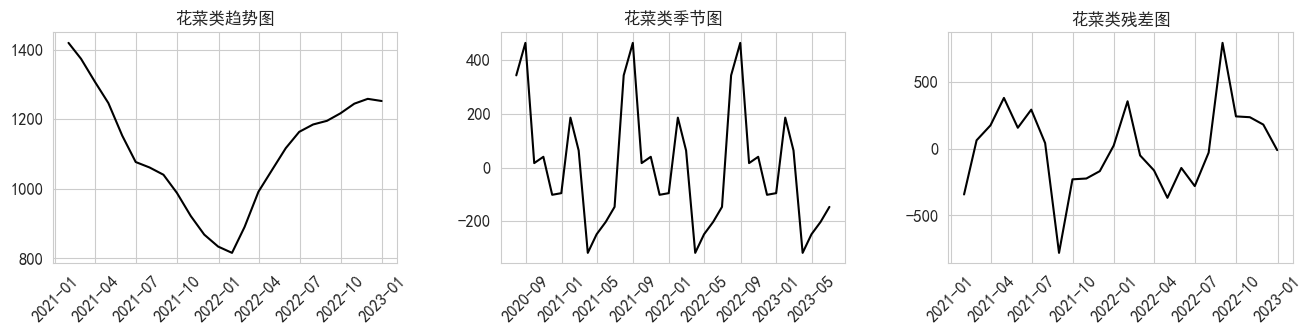

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 3))
fig.subplots_adjust(wspace=0.3, hspace=0.3) 

ax[0].plot(decomposition1.trend, color='black')
ax[0].set_title("花菜类趋势图", fontsize=12)
ax[1].plot(decomposition1.seasonal, color='black')
ax[1].set_title("花菜类季节图", fontsize=12)
ax[2].plot(decomposition1.resid, color='black')
ax[2].set_title("花菜类残差图", fontsize=12)

# 旋转横坐标标签

for j in range(3):
    ax[j].set_xticklabels(ax[j].get_xticklabels(), rotation=45)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


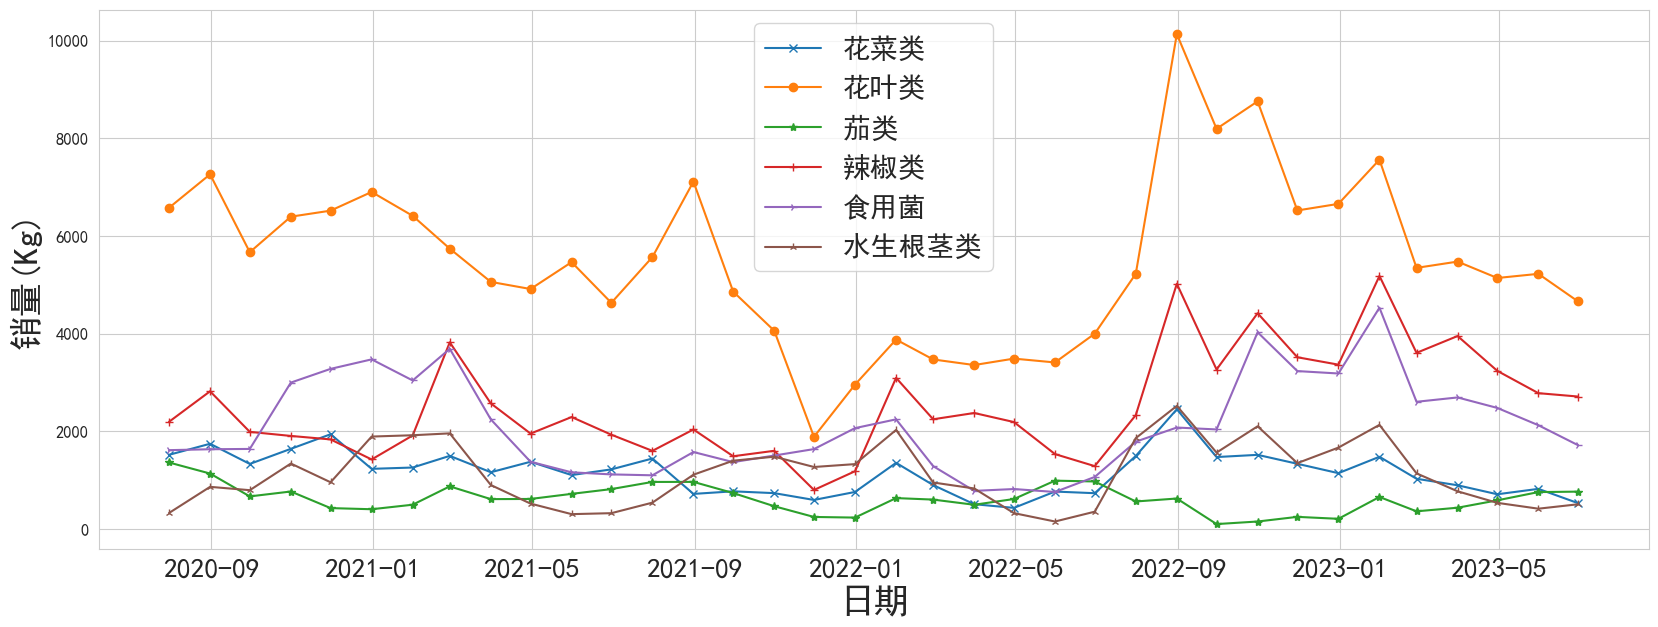

In [32]:
plt.figure(figsize=(20, 7))
sns.set_style("whitegrid", {'font.sans-serif':['simhei', 'Arial']})

plt.plot(df1['日期'], df1['销量(千克)'], label=df_clean.columns[0], linestyle='-', marker="x")
plt.plot(df2['日期'], df2['销量(千克)'], label=df_clean.columns[1], linestyle='-', marker="o")
plt.plot(df3['日期'], df3['销量(千克)'], label=df_clean.columns[2], linestyle='-', marker="*")
plt.plot(df4['日期'], df4['销量(千克)'], label=df_clean.columns[3], linestyle='-', marker="+")
plt.plot(df5['日期'], df5['销量(千克)'], label=df_clean.columns[4], linestyle='-', marker="4")
plt.plot(df6['日期'], df6['销量(千克)'], label=df_clean.columns[5], linestyle='-', marker="2")
plt.ylabel("销量(Kg)",fontsize=25)
plt.xlabel("日期",fontsize=25)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)

plt.savefig('绘图文件夹\\正文图2.eps')